# <font color='blue'> This notebook performs unit tests on the all the individual functions of my tool suite </font>

In [1]:
import  MyToolSet as myfunc

import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [2]:
from sklearn.model_selection import train_test_split
filepath='train_Loan.csv'
df_source=pd.read_csv(filepath)
print(df_source.shape)
df_source.head()

(614, 13)


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
# Declarations
index_col='Loan_ID'
df_source.set_index(index_col,inplace=True)
target='Loan_Status'
predictors=list(df_source.columns.difference([target]))


In [4]:


df_source.ApplicantIncome=df_source.ApplicantIncome.astype(float)
X=df_source[predictors]
Y=df_source[target]

X_train, X_test, y_train, y_test=train_test_split(X,Y,test_size=0.33)
train=pd.concat([X_train,y_train],axis=1)

In [5]:
train.dtypes

ApplicantIncome      float64
CoapplicantIncome    float64
Credit_History       float64
Dependents            object
Education             object
Gender                object
LoanAmount           float64
Loan_Amount_Term     float64
Married               object
Property_Area         object
Self_Employed         object
Loan_Status           object
dtype: object

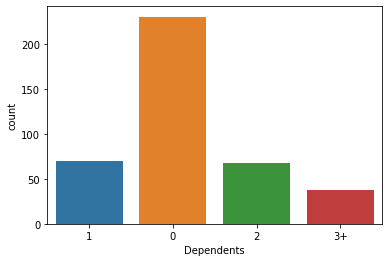

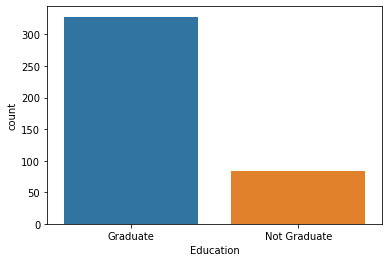

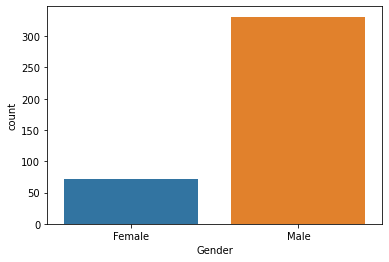

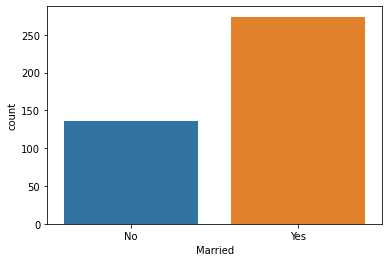

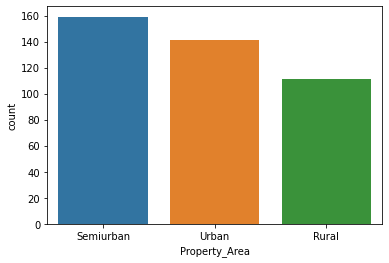

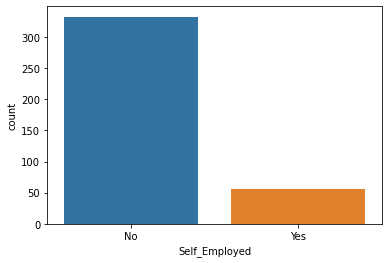

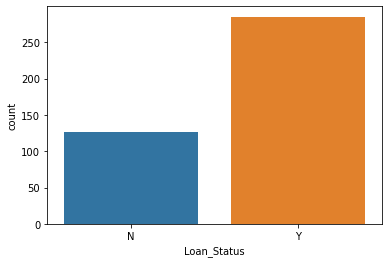

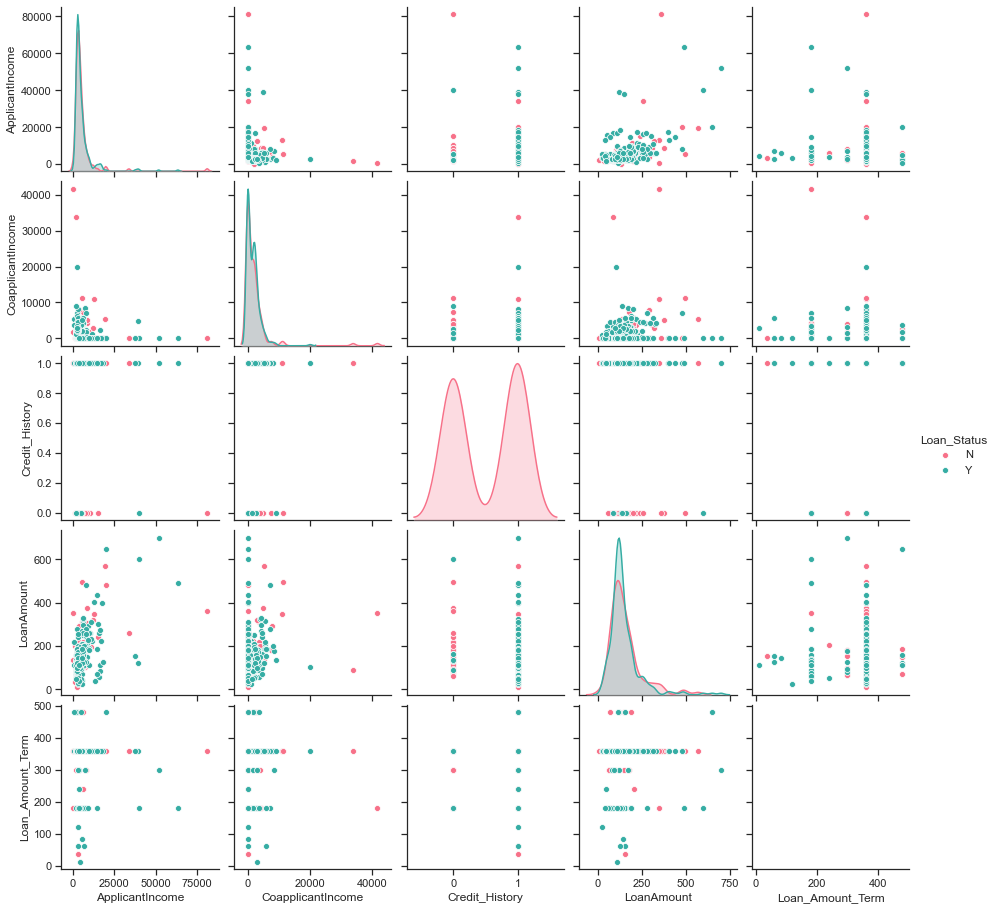

In [6]:
# Test the first function to explore data visually
myfunc.my_plot(train,'Loan_Status')

import pandas_profiling as pp
# pp.ProfileReport(train)

In [7]:
dfToPredict=pd.read_csv('test_Loan.csv').set_index('Loan_ID')
dfToPredict['Loan_Status']='NA'


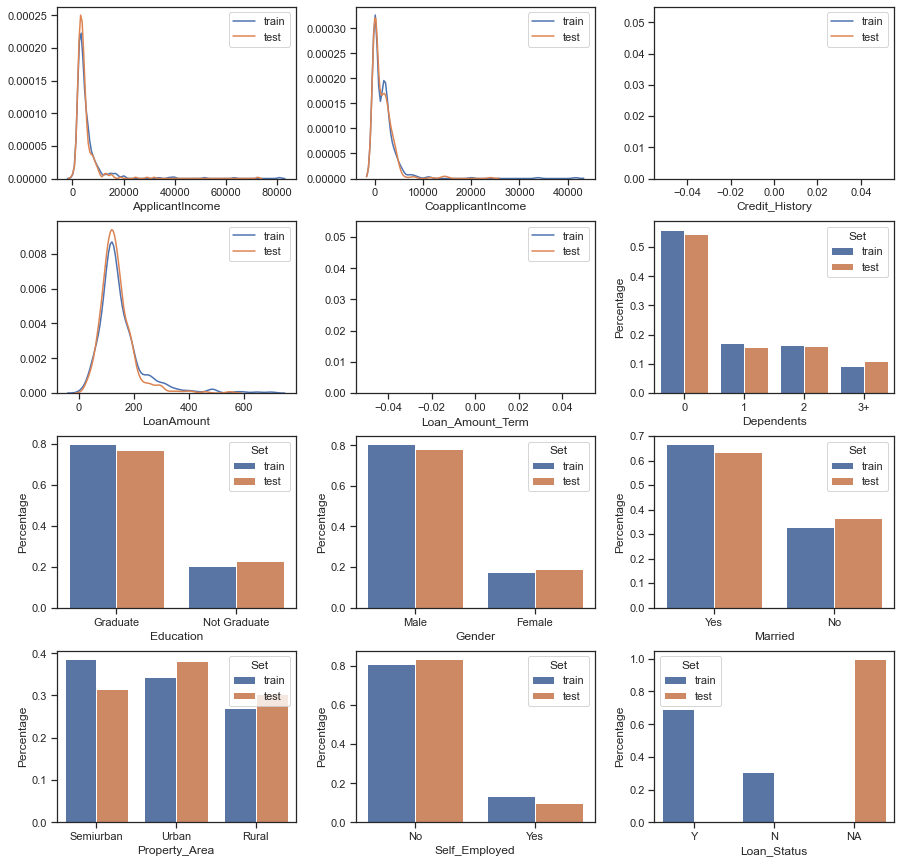

In [8]:
# Test the second function for equality check between train and test data

myfunc.distComparison(train,dfToPredict)

In [9]:
# Test the presence of missing values

myfunc.missing_values_table(train)

ApplicantIncome      float64
CoapplicantIncome    float64
Credit_History       float64
Dependents            object
Education             object
Gender                object
LoanAmount           float64
Loan_Amount_Term     float64
Married               object
Property_Area         object
Self_Employed         object
Loan_Status           object
dtype: object
Your selected dataframe has 12 columns.
There are 7 columns that have missing values.


,Missing Values,% of Total Values
Credit_History,34,8.3
Self_Employed,23,5.6
LoanAmount,19,4.6
Loan_Amount_Term,11,2.7
Gender,8,1.9
Dependents,6,1.5
Married,1,0.2


In [10]:
# df_SourceTrain.set_index(['PassengerId'],inplace=True)

df_imputedTrain=myfunc.impute_all(train)
df_imputedTrain.head()

Numerics Index(['ApplicantIncome', 'CoapplicantIncome', 'Credit_History', 'LoanAmount',
       'Loan_Amount_Term'],
      dtype='object')
Categories Index(['Dependents', 'Education', 'Gender', 'Loan_Status', 'Married',
       'Property_Area', 'Self_Employed'],
      dtype='object')


ApplicantIncome      float64
CoapplicantIncome    float64
Credit_History       float64
LoanAmount           float64
Loan_Amount_Term     float64
Dependents            object
Education             object
Gender                object
Loan_Status           object
Married               object
Property_Area         object
Self_Employed         object
dtype: object
Your selected dataframe has 12 columns.
There are 3 columns that have missing values.
Treating--> ApplicantIncome
ApplicantIncome Has no missing value.Skipping to next one
Treating--> CoapplicantIncome
CoapplicantIncome Has no missing value.Skipping to next one
Treating--> Credit_History
Treating--> Dependents
Dependents Has no missing value.Skipping 

,ApplicantIncome,CoapplicantIncome,Credit_History,LoanAmount,Loan_Amount_Term,Dependents,Education,Gender,Loan_Status,Married,Property_Area,Self_Employed
Loan_ID,,,,,,,,,,,,
LP002161,4723.0,0.0,1.0,81.0,360.0,1,Graduate,Female,N,No,Semiurban,No
LP001954,4666.0,0.0,1.0,135.0,360.0,1,Graduate,Female,Y,Yes,Urban,No
LP001043,7660.0,0.0,0.0,104.0,360.0,0,Not Graduate,Male,N,Yes,Urban,No
LP002068,4917.0,0.0,0.0,130.0,360.0,0,Graduate,Male,Y,No,Rural,No
LP001155,1928.0,1644.0,1.0,100.0,360.0,0,Not Graduate,Female,Y,Yes,Semiurban,No



 --- Outlier removal process triggered,with shape of data, (411, 13)

----------------------------------- Percentage of data points flagged as outliers  5.11  %---------------
 1    390
-1     21
Name: anomaly, dtype: int64


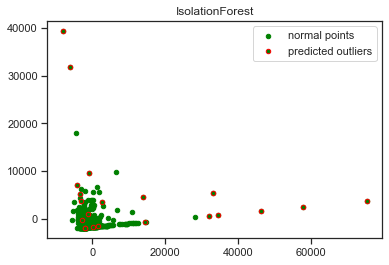

(390, 13)


,ApplicantIncome,CoapplicantIncome,Credit_History,Dependents,Education,Gender,LoanAmount,Loan_Amount_Term,Loan_ID,Loan_Status,Married,Property_Area,Self_Employed
0,4723.0,0.0,1.0,1,Graduate,Female,81.0,360.0,LP002161,N,No,Semiurban,No
1,4666.0,0.0,1.0,1,Graduate,Female,135.0,360.0,LP001954,Y,Yes,Urban,No
2,7660.0,0.0,0.0,0,Not Graduate,Male,104.0,360.0,LP001043,N,Yes,Urban,No
3,4917.0,0.0,0.0,0,Graduate,Male,130.0,360.0,LP002068,Y,No,Rural,No
4,1928.0,1644.0,1.0,0,Not Graduate,Female,100.0,360.0,LP001155,Y,Yes,Semiurban,No


In [11]:
# df_imputedTrain=df_imputedTrain.drop(columns=['Cabin'])
df_original,dfimputedTrain=myfunc.outlier_detection(df_imputedTrain.reset_index())
print(dfimputedTrain.shape)
dfimputedTrain.head()

In [12]:
dfProcessed=myfunc.pre_process(df_imputedTrain,'standard')
# myfunc.box_plot(dfProcessed)


 Scaling of features completed

 Encoding categories
Index(['Dependents', 'Education', 'Gender', 'Loan_Status', 'Married',
       'Property_Area', 'Self_Employed'],
      dtype='object')


In [13]:
dfProcessed.head()

,ApplicantIncome,CoapplicantIncome,Credit_History,LoanAmount,Loan_Amount_Term,Dependents,Education,Gender,Loan_Status,Married,Property_Area,Self_Employed
0,-0.136793,-0.532444,0.428472,-0.794262,0.27463,4,1,2,1,0,0,0
1,-0.144984,-0.532444,0.428472,-0.174872,0.27463,4,1,2,1,0,0,0
2,0.285263,-0.532444,-2.344790,-0.530448,0.27463,4,1,2,1,0,0,0
3,-0.108914,-0.532444,-2.344790,-0.232223,0.27463,4,1,2,1,0,0,0
4,-0.538443,-0.028836,0.428472,-0.576328,0.27463,4,1,2,1,0,0,0



 Principal Component Analysis Triggered
Data is not scaled. Applying Standard Scaling with mean 0 ans s.d=1
[0.313 0.22  0.205 0.189 0.073]


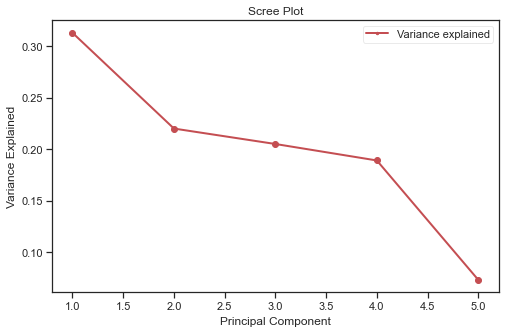

In [14]:
pca_df,maxLoading=myfunc.My_PrincipalComponentAnalysis(df_imputedTrain)

In [15]:
pca_df

,Component-1,Component-2,Component-3,Component-4,Component-5
ApplicantIncome,0.695289,-0.221097,-0.114949,0.135334,0.660424
CoapplicantIncome,0.074080,0.793234,0.423703,-0.288298,0.320393
Credit_History,-0.058750,-0.180532,0.762953,0.617901,0.007587
LoanAmount,0.709082,0.066623,0.174920,-0.120884,-0.668995
Loan_Amount_Term,-0.069542,-0.533727,0.441099,-0.708629,0.116518


In [16]:
maxLoading

,Component-1,Component-2,Component-3,Component-4,Component-5
0,-0.742022,-0.668955,0.099237,0.301146,0.305675
1,-0.308519,-0.625878,0.208523,0.225163,-0.114104
2,-0.098576,-0.244031,-2.019000,-1.387229,0.386880
3,-0.161178,-0.137010,-1.921524,-1.476625,-0.072956
4,-0.829445,-0.166153,0.396907,0.075256,0.055971
...,...,...,...,...,...
406,0.994234,-0.321752,0.517222,0.056975,-0.134984
407,0.586731,-0.759789,0.211311,0.265783,0.043301
408,-0.064136,0.329402,-1.642465,-1.674864,-0.140628
409,-0.164044,-0.722078,0.134372,0.297829,0.254110


In [17]:
# pca_df,maxLoading=myfunc.My_FactorAnalyzer(data)

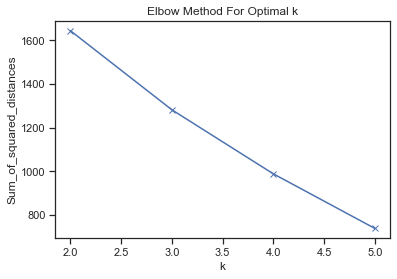

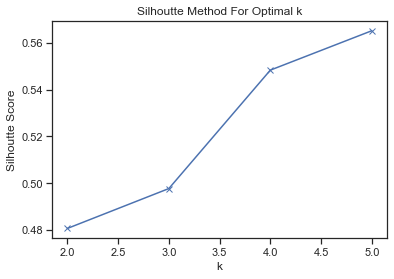

In [18]:
predict=myfunc.my_KMeans(maxLoading)

In [19]:
pd.concat([maxLoading,pd.DataFrame(predict,columns=['Cluster'])],axis=1).describe()

,Component-1,Component-2,Component-3,Component-4,Component-5,Cluster
count,4.110000e+02,4.110000e+02,4.110000e+02,4.110000e+02,4.110000e+02,411.000000
mean,-2.106993e-17,3.781782e-18,7.090840e-18,3.714250e-17,-4.537294e-18,1.309002
std,1.252749e+00,1.049324e+00,1.014620e+00,9.735508e-01,6.037210e-01,0.939326
min,-1.561921e+00,-2.378590e+00,-3.088832e+00,-2.969025e+00,-2.366797e+00,0.000000
25%,-6.237553e-01,-6.250554e-01,1.609697e-03,-1.234908e-01,-2.064229e-01,1.000000
50%,-3.085187e-01,-1.370104e-01,2.452248e-01,9.314900e-02,-6.646979e-03,1.000000
75%,1.605420e-01,2.526638e-01,5.216345e-01,2.552382e-01,1.477566e-01,1.000000
max,9.311339e+00,1.136568e+01,4.822746e+00,4.028862e+00,5.382800e+00,4.000000


In [20]:


dfBalancedImputedProcessed=myfunc.BalancedSample(myfunc.pre_process(df_imputedTrain),target,2)
print(dfBalancedImputedProcessed.columns)
# (df_numeric.value_counts(),dfBalancedImputedProcessed.value_counts())




 Encoding categories
Index(['Dependents', 'Education', 'Gender', 'Loan_Status', 'Married',
       'Property_Area', 'Self_Employed'],
      dtype='object')

the data originally has a shape--------->
 1    285
0    126
Name: Loan_Status, dtype: int64

the data now has a shape------->
 0    86
1    86
Name: Loan_Status, dtype: int64
Index(['ApplicantIncome', 'CoapplicantIncome', 'Credit_History', 'Dependents',
       'Education', 'Gender', 'LoanAmount', 'Loan_Amount_Term', 'Married',
       'Property_Area', 'Self_Employed', 'Loan_Status'],
      dtype='object')
